In [1]:
import torch

In [20]:
from datasets.mvtec import MVTecDataset

In [21]:
train_mvtec=MVTecDataset(
    "/workspace/datasets/mvtec_balanced.pth",
    "/datasets/split_ss_mvtec_balanced",
    "train"
)
test_mvtec=MVTecDataset(
    "/workspace/datasets/mvtec_balanced.pth",
    "/datasets/split_ss_mvtec_balanced",
    "test"
)

/workspace/datasets/mvtec_balanced.pth found, loading...


In [12]:
import glob 
import shutil
base_path = "/datasets/split_ss_mvtec_balanced/"

images = glob.glob(base_path + "*.png")
image_ids = [image.split("/")[-1].split(".")[0] for image in images]

In [13]:
import numpy as np
test_ids = np.random.choice(image_ids, len(image_ids)//10, replace=False).tolist()
train_ids = list(set(image_ids) - set(test_ids))

In [15]:
for train_id in train_ids:
    shutil.copy(base_path + train_id + ".png", base_path + "trainval/images/" + train_id + ".png")
    shutil.copy(base_path + train_id + ".txt", base_path + "trainval/annfiles/" + train_id + ".txt")
for test_id in test_ids:
    shutil.copy(base_path + test_id + ".png", base_path + "test/images/" + test_id + ".png")
    shutil.copy(base_path + test_id + ".txt", base_path + "test/annfiles/" + test_id + ".txt")

In [22]:
import glob
datasets = glob.glob("/workspace/datasets/*.pth")

In [25]:
import torch

In [26]:
temp = torch.load(datasets[-1])

In [27]:
train, test = temp['train'], temp['test']

In [28]:
train_labels, test_labels = torch.empty(0), torch.empty(0)
for i in range(len(train)):
    train_labels = torch.cat((train_labels, train[i]['labels']))

for i in range(len(test)):
    test_labels = torch.cat((test_labels, test[i]['labels']))
train_labels, test_labels = train_labels.numpy(), test_labels.numpy()

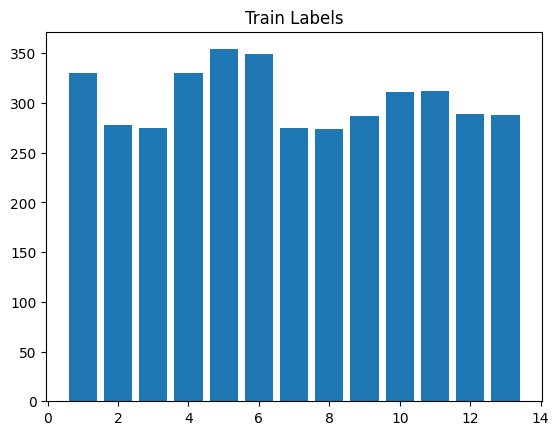

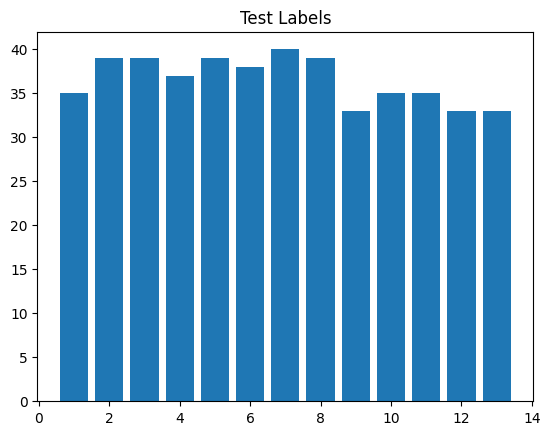

In [29]:
from collections import Counter
import matplotlib.pyplot as plt
train_labels, test_labels = Counter(train_labels), Counter(test_labels)

plt.bar(train_labels.keys(), train_labels.values())
plt.title("Train Labels")
plt.show()

plt.bar(test_labels.keys(), test_labels.values())
plt.title("Test Labels")
plt.show()

In [23]:
stats = {}
for filename in datasets:
    data = torch.load(filename)
    data = data["train"]
    stats[filename] = {}
    
    labels_count = {}
    labels_area = {}
    labels_oarea = {}
    labels_angle = {}
    labels_area_oarea_ratio = {}
    labels_aspect_ratio = {}
    for entry in data:
        areas = entry["area"]
        oareas = entry["oarea"]
        labels = entry["labels"]
        oboxes = entry["oboxes"]
        angles = oboxes[:, -1]
        aspect_ratios = oboxes[:, 2] / oboxes[:, 3]
        
        area_ratios = oareas / areas
        
        for label, area, oarea, area_ratio, angle, aspect_ratio in zip(labels, areas, oareas, area_ratios, angles, aspect_ratios):
            label, area, oarea, area_ratio, angle, aspect_ratio = int(label), float(area), float(oarea), float(area_ratio), float(angle), float(aspect_ratio)
            labels_count[label] = labels_count.get(label, 0) + 1
            labels_area[label] = labels_area.get(label, []) + [area]
            labels_oarea[label] = labels_oarea.get(label, []) + [oarea]
            labels_area_oarea_ratio[label] = labels_area_oarea_ratio.get(label, []) + [area_ratio]
            labels_angle[label] = labels_angle.get(label, []) + [angle]
            labels_aspect_ratio[label] = labels_aspect_ratio.get(label, []) + [aspect_ratio]

    stats[filename]["labels_count"] = labels_count
    stats[filename]["labels_area"] = labels_area
    stats[filename]["labels_oarea"] = labels_oarea
    stats[filename]["labels_area_oarea_ratio"] = labels_area_oarea_ratio
    stats[filename]["labels_aspect_ratio"] = labels_aspect_ratio
    stats[filename]["labels_angle"] = labels_angle


In [25]:
torch.save(stats, "/workspace/stats.pth")


{'/workspace/datasets/mvtec.pth': {'labels_count': {1: 358,
   2: 310,
   3: 245,
   4: 360,
   5: 324,
   6: 318,
   7: 308,
   8: 244,
   9: 252,
   10: 277,
   11: 277,
   12: 315,
   13: 314},
  'labels_area': {1: [3410.0,
    3720.0,
    3968.0,
    3844.0,
    3900.0,
    4473.0,
    4828.0,
    4224.0,
    4216.0,
    1798.0,
    4216.0,
    4473.0,
    3422.0,
    4154.0,
    4420.0,
    4899.0,
    4092.0,
    3600.0,
    4148.0,
    3782.0,
    4485.0,
    5070.0,
    3894.0,
    4550.0,
    4356.0,
    4092.0,
    3477.0,
    4158.0,
    3654.0,
    4488.0,
    4488.0,
    4554.0,
    3306.0,
    4356.0,
    4160.0,
    4290.0,
    4290.0,
    4224.0,
    3720.0,
    3540.0,
    4160.0,
    4420.0,
    4087.0,
    3538.0,
    4160.0,
    4225.0,
    3780.0,
    3906.0,
    3660.0,
    3538.0,
    4290.0,
    4422.0,
    3600.0,
    3844.0,
    4290.0,
    4284.0,
    3965.0,
    4158.0,
    4095.0,
    4224.0,
    4224.0,
    4355.0,
    4225.0,
    4290.0,
    4095.0,
    4

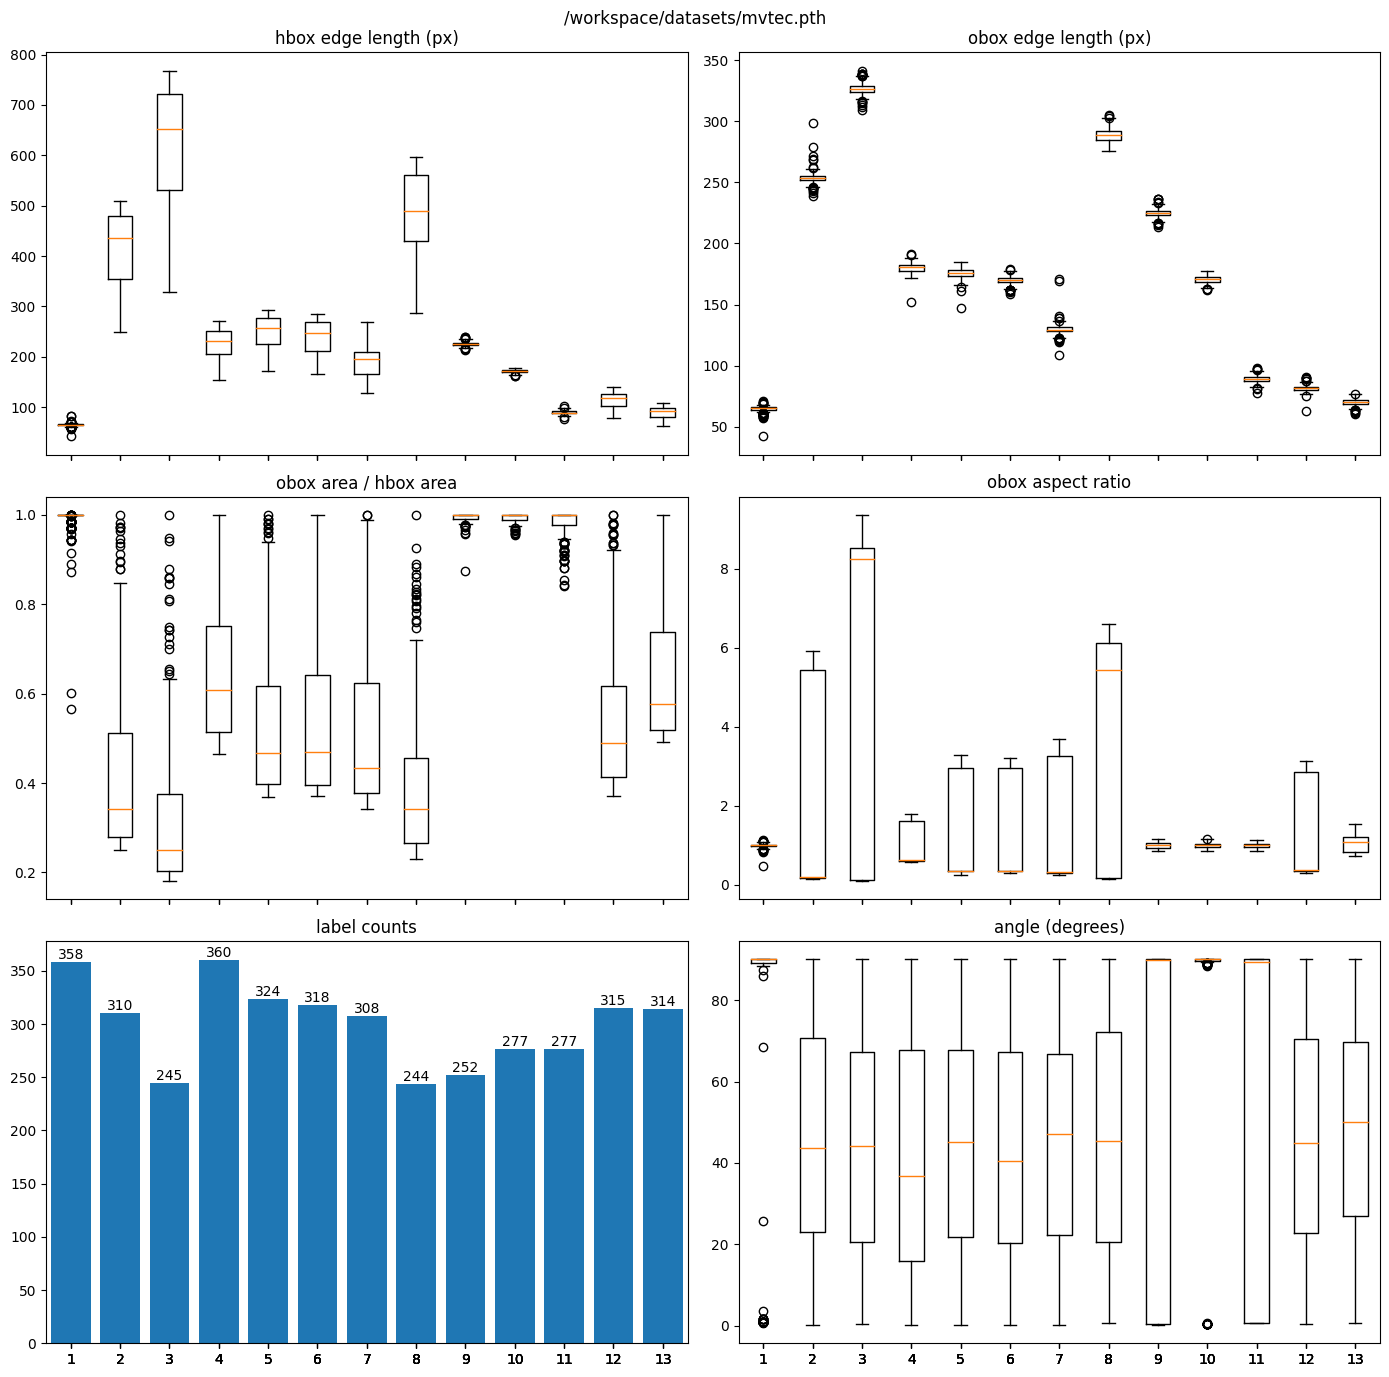

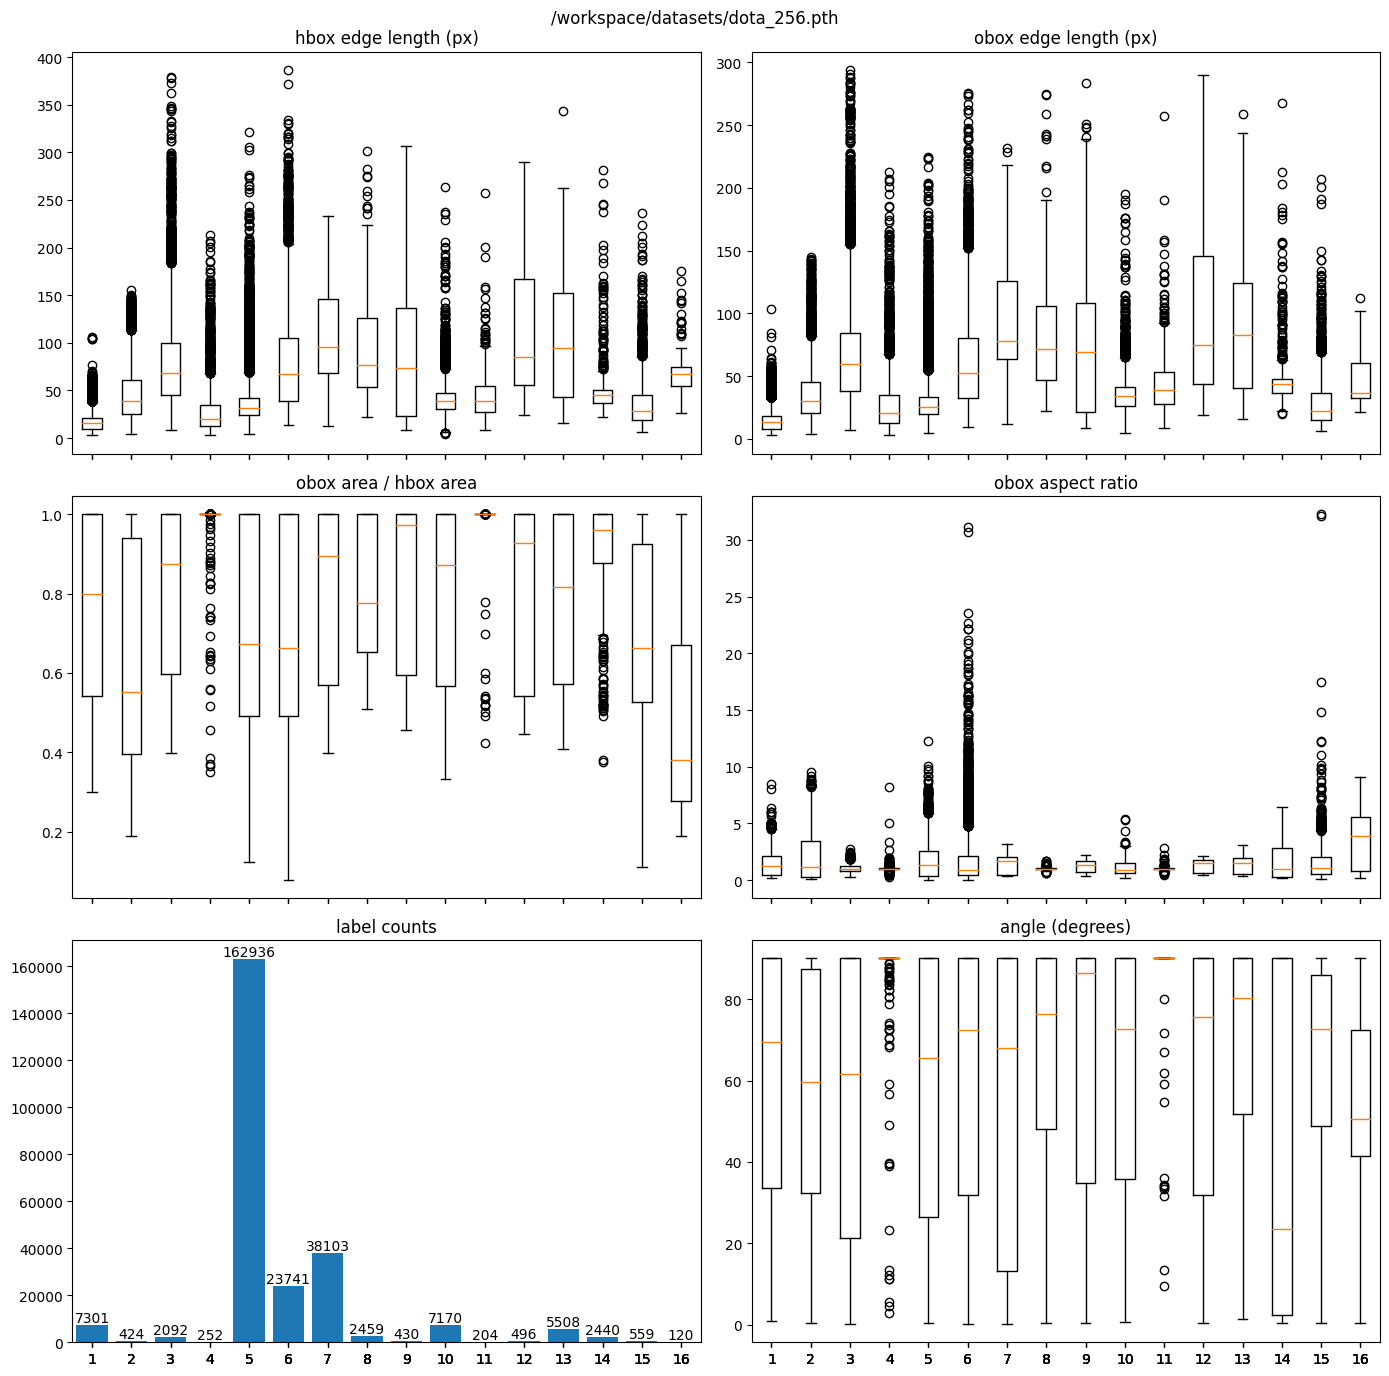

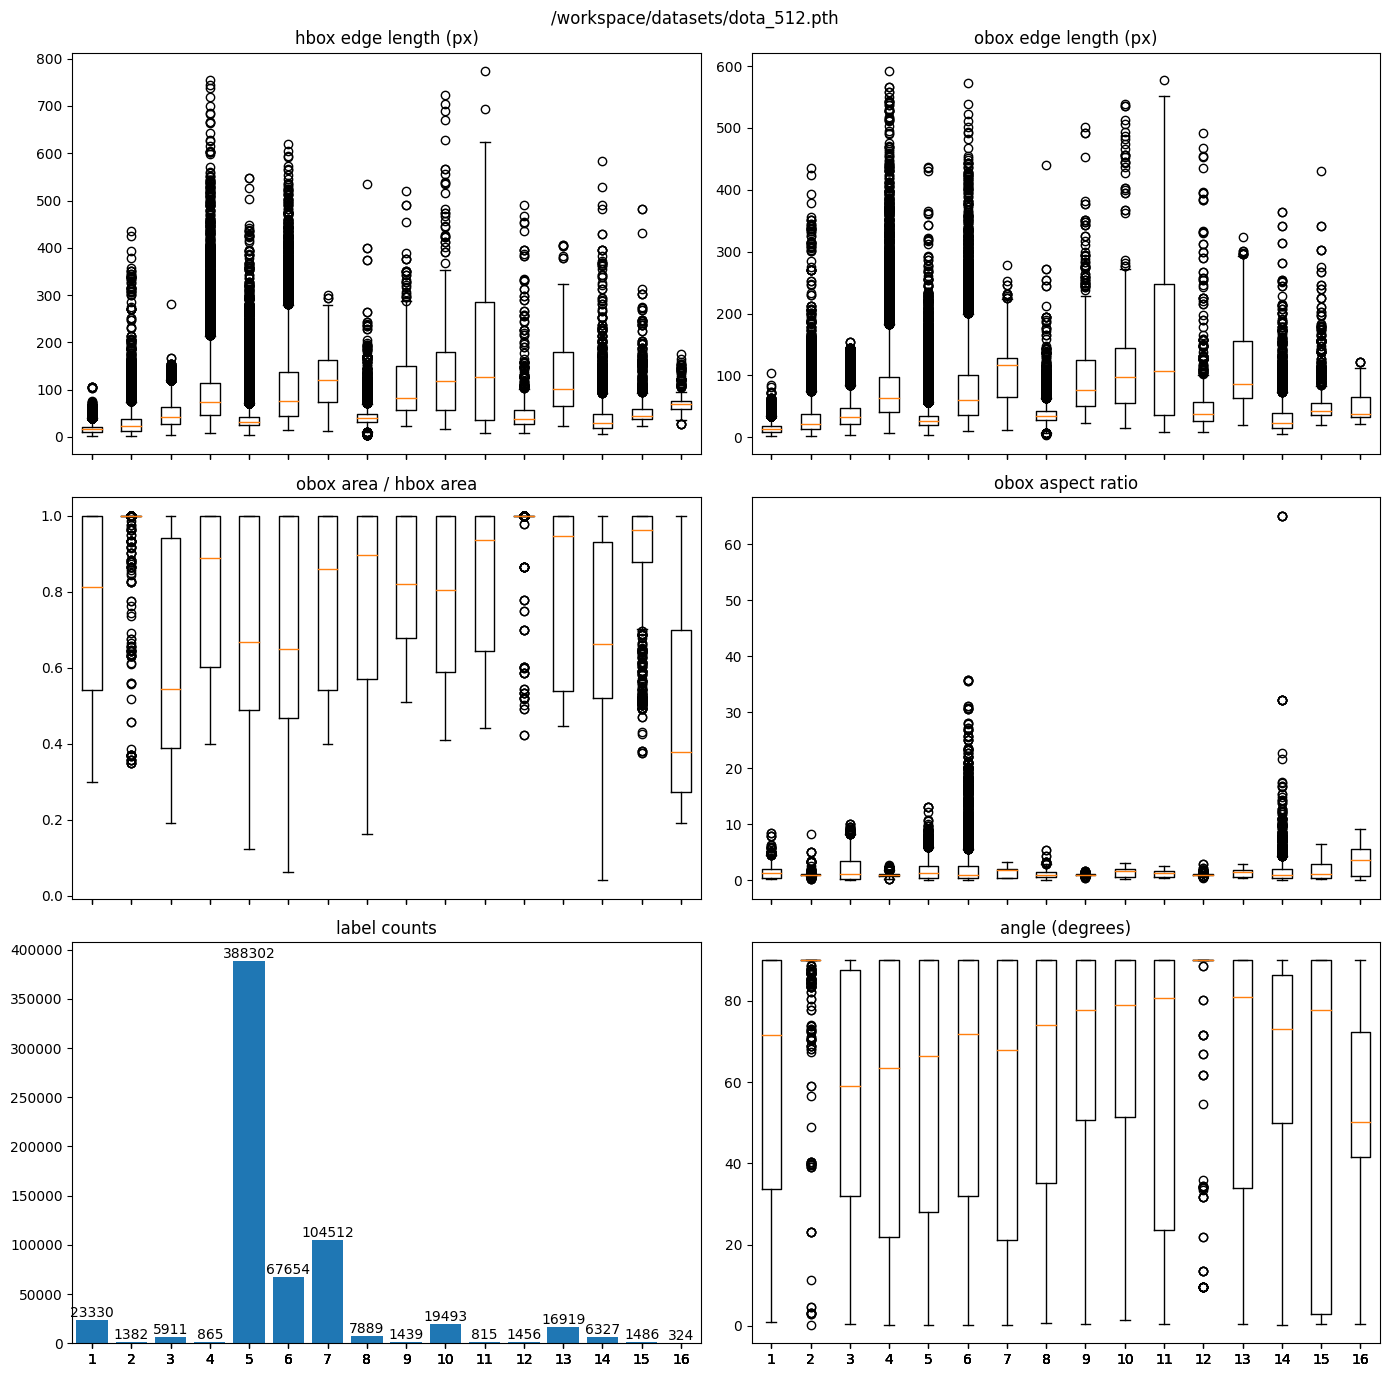

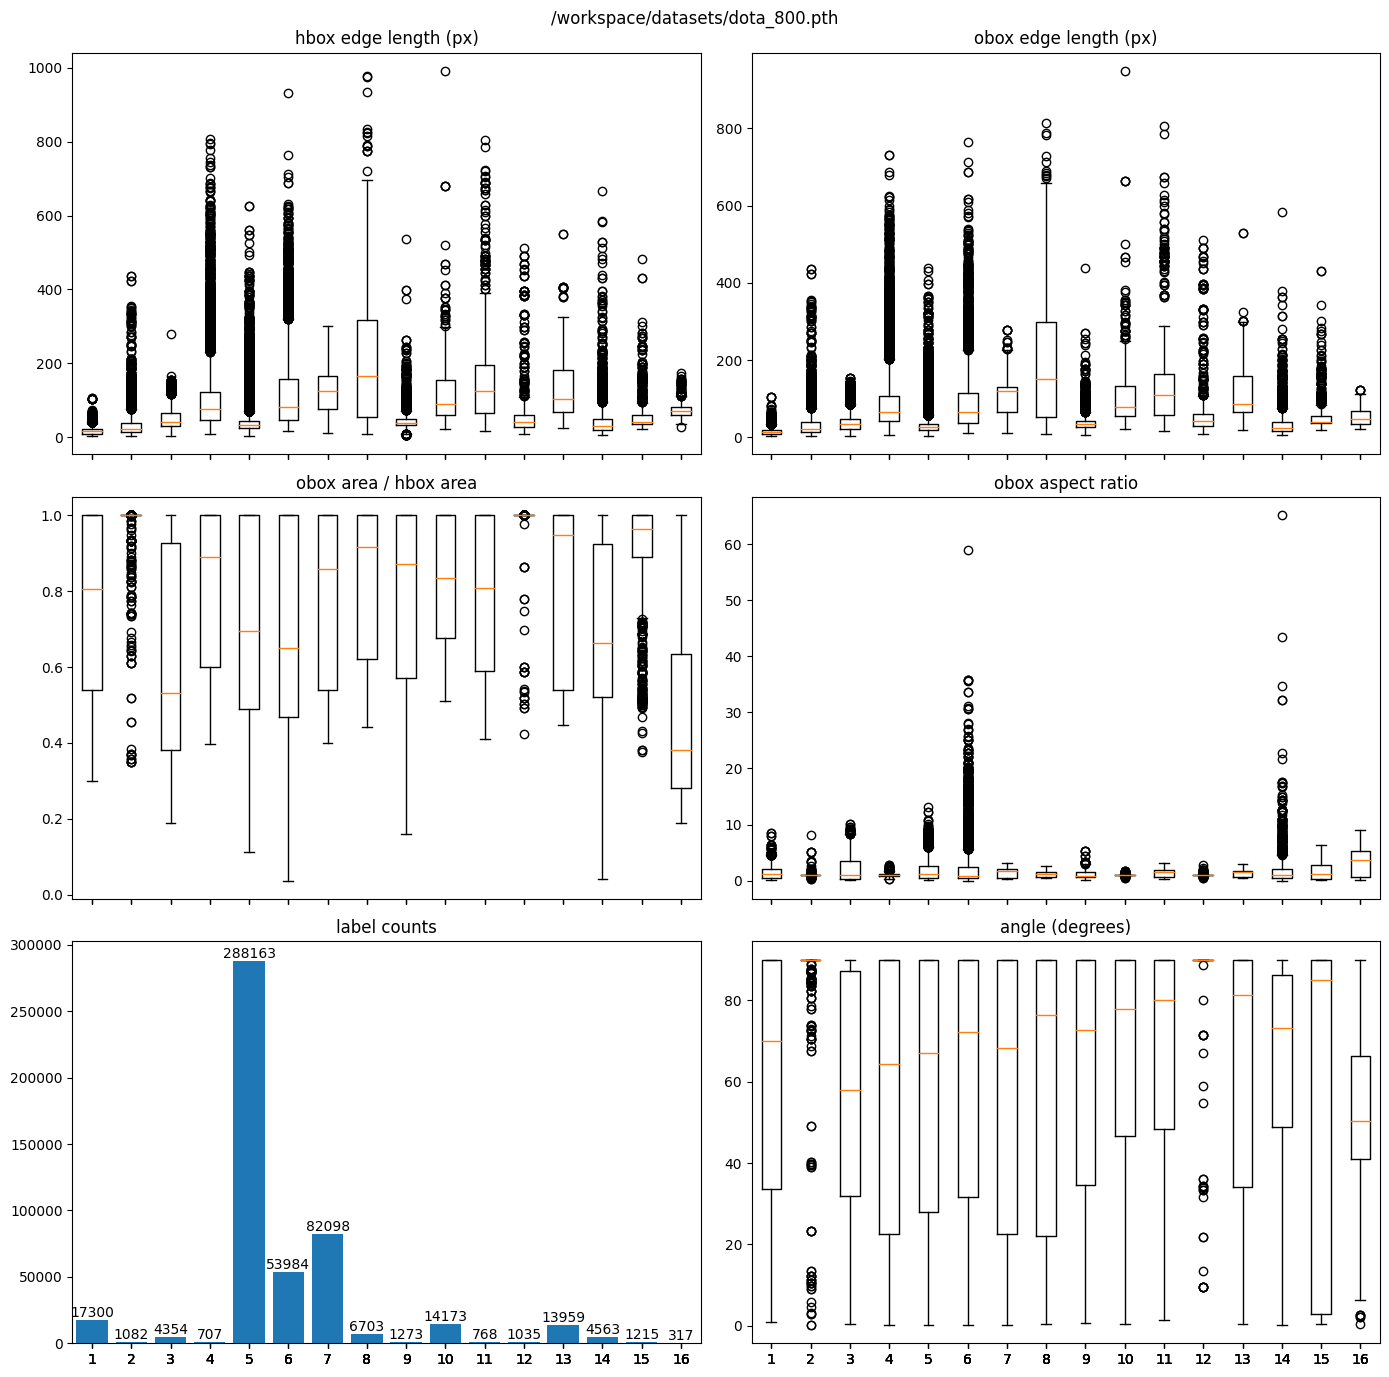

In [53]:
import matplotlib.pyplot as plt

for filename, stat in stats.items():
    labels_count = stat["labels_count"]
    labels_area = stat["labels_area"]
    labels_oarea = stat["labels_oarea"]
    labels_area_oarea_ratio = stat["labels_area_oarea_ratio"]
    labels_aspect_ratio = stat["labels_aspect_ratio"]
    labels_angle = stat["labels_angle"]
    fig, axs = plt.subplots(3, 2, sharex=True, figsize=(14, 14))
    fig.suptitle(filename)  
    labels_hbox_mean_edge = {k: [v ** 0.5 for v in vs] for k, vs in labels_area.items()}
    axs[0,0].boxplot(labels_hbox_mean_edge.values())
    axs[0,0].set_title("hbox edge length (px)")
    labels_obox_mean_edge = {k: [v ** 0.5 for v in vs] for k, vs in labels_oarea.items()}
    axs[0,1].boxplot(labels_obox_mean_edge.values())
    axs[0,1].set_title("obox edge length (px)")
    
    axs[1,0].boxplot(labels_area_oarea_ratio.values())
    axs[1,0].set_title("obox area / hbox area")
    axs[1,1].boxplot(labels_aspect_ratio.values())
    axs[1,1].set_title("obox aspect ratio")
    axs[2,0].bar(labels_count.keys(), labels_count.values())
    axs[2,0].bar_label(axs[2,0].containers[0])
    axs[2,0].set_title("label counts")
    labels_angle_degrees = {k: [v * 180 / 3.1415 for v in vs] for k, vs in labels_angle.items()}
    axs[2,1].boxplot(labels_angle_degrees.values())
    axs[2,1].set_title("angle (degrees)")
    fig.tight_layout()
    
    plt.savefig(filename.split("/")[-1].replace(".pth", ".png"))